<a href="https://colab.research.google.com/github/Ramsai-g/-/blob/master/Copy_of_Breast_Cancer_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Source for data: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data

In [0]:
#import libraries
import numpy as np # Calculations, arrays
import pandas as pd # For manipulations
import matplotlib.pyplot as plt # plotting and visualization
import seaborn as sns # Another kind of visualization / Speciality

In [0]:

#Load the data
from google.colab import files # Use to load data on Google Colab
uploaded = files.upload() # Use to load data on Google Colab
df = pd.read_csv('data.csv')
df.head(5)

Saving data.csv to data (3).csv


ID Diagnosis      3      4  ...      29      30      31  Unnamed: 31
0    842302         M  17.99  10.38  ...  0.7119  0.2654  0.4601      0.11890
1    842517         M  20.57  17.77  ...  0.2416  0.1860  0.2750      0.08902
2  84300903         M  19.69  21.25  ...  0.4504  0.2430  0.3613      0.08758
3  84348301         M  11.42  20.38  ...  0.6869  0.2575  0.6638      0.17300
4  84358402         M  20.29  14.34  ...  0.4000  0.1625  0.2364      0.07678

[5 rows x 32 columns]

In [0]:
#Count the number of rows and columns in the data set
df.shape

(569, 32)

In [0]:
#Count the empty (NaN, NAN, na) values in each column
df.isna().sum() 

ID             0
Diagnosis      0
3              0
4              0
5              0
6              0
7              0
8              0
9              0
10             0
11             0
12             0
13             0
14             0
15             0
16             0
17             0
18             0
19             0
20             0
21             0
22             0
23             0
24             0
25             0
26             0
27             0
28             0
29             0
30             0
31             0
Unnamed: 31    0
dtype: int64

In [0]:
#Drop the column with all missing values (na, NAN, NaN)

df = df.dropna(axis=1)

In [0]:
#Get the new count 
df.shape

(569, 32)

In [0]:
#Get a count of the number of Malignant (M) (harmful) or Benign (B) cells (not harmful)
df['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

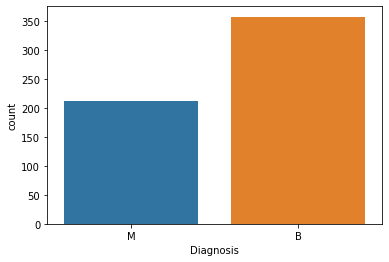

In [0]:
#Visualize this count of Malignant / Benign
sns.countplot(df['Diagnosis'],label="Count")

In [0]:
df.dtypes   

ID               int64
Diagnosis       object
3              float64
4              float64
5              float64
6              float64
7              float64
8              float64
9              float64
10             float64
11             float64
12             float64
13             float64
14             float64
15             float64
16             float64
17             float64
18             float64
19             float64
20             float64
21             float64
22             float64
23             float64
24             float64
25             float64
26             float64
27             float64
28             float64
29             float64
30             float64
31             float64
Unnamed: 31    float64
dtype: object

In [0]:
#Transform/ Encode the column diagnosis
#dictionary = {'M':1, 'B':0}#Create a dictionary file
#df.diagnosis = [dictionary[item] for item in df.diagnosis] #Change all 'M' to 1 and all 'B' to 0 in the diagnosis col

#Encoding categorical data values (Transforming categorical data/ Strings to integers)
from sklearn.preprocessing import LabelEncoder
labelencoder_Y = LabelEncoder()
df.iloc[:,1]= labelencoder_Y.fit_transform(df.iloc[:,1].values)
print(labelencoder_Y.fit_transform(df.iloc[:,1].values))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

In [0]:
df.head(5) #// After Transformations

ID  Diagnosis      3      4  ...      29      30      31  Unnamed: 31
0    842302          1  17.99  10.38  ...  0.7119  0.2654  0.4601      0.11890
1    842517          1  20.57  17.77  ...  0.2416  0.1860  0.2750      0.08902
2  84300903          1  19.69  21.25  ...  0.4504  0.2430  0.3613      0.08758
3  84348301          1  11.42  20.38  ...  0.6869  0.2575  0.6638      0.17300
4  84358402          1  20.29  14.34  ...  0.4000  0.1625  0.2364      0.07678

[5 rows x 32 columns]

/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/usr/local/lib/python3.6/dist-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


KeyboardInterrupt: ignored

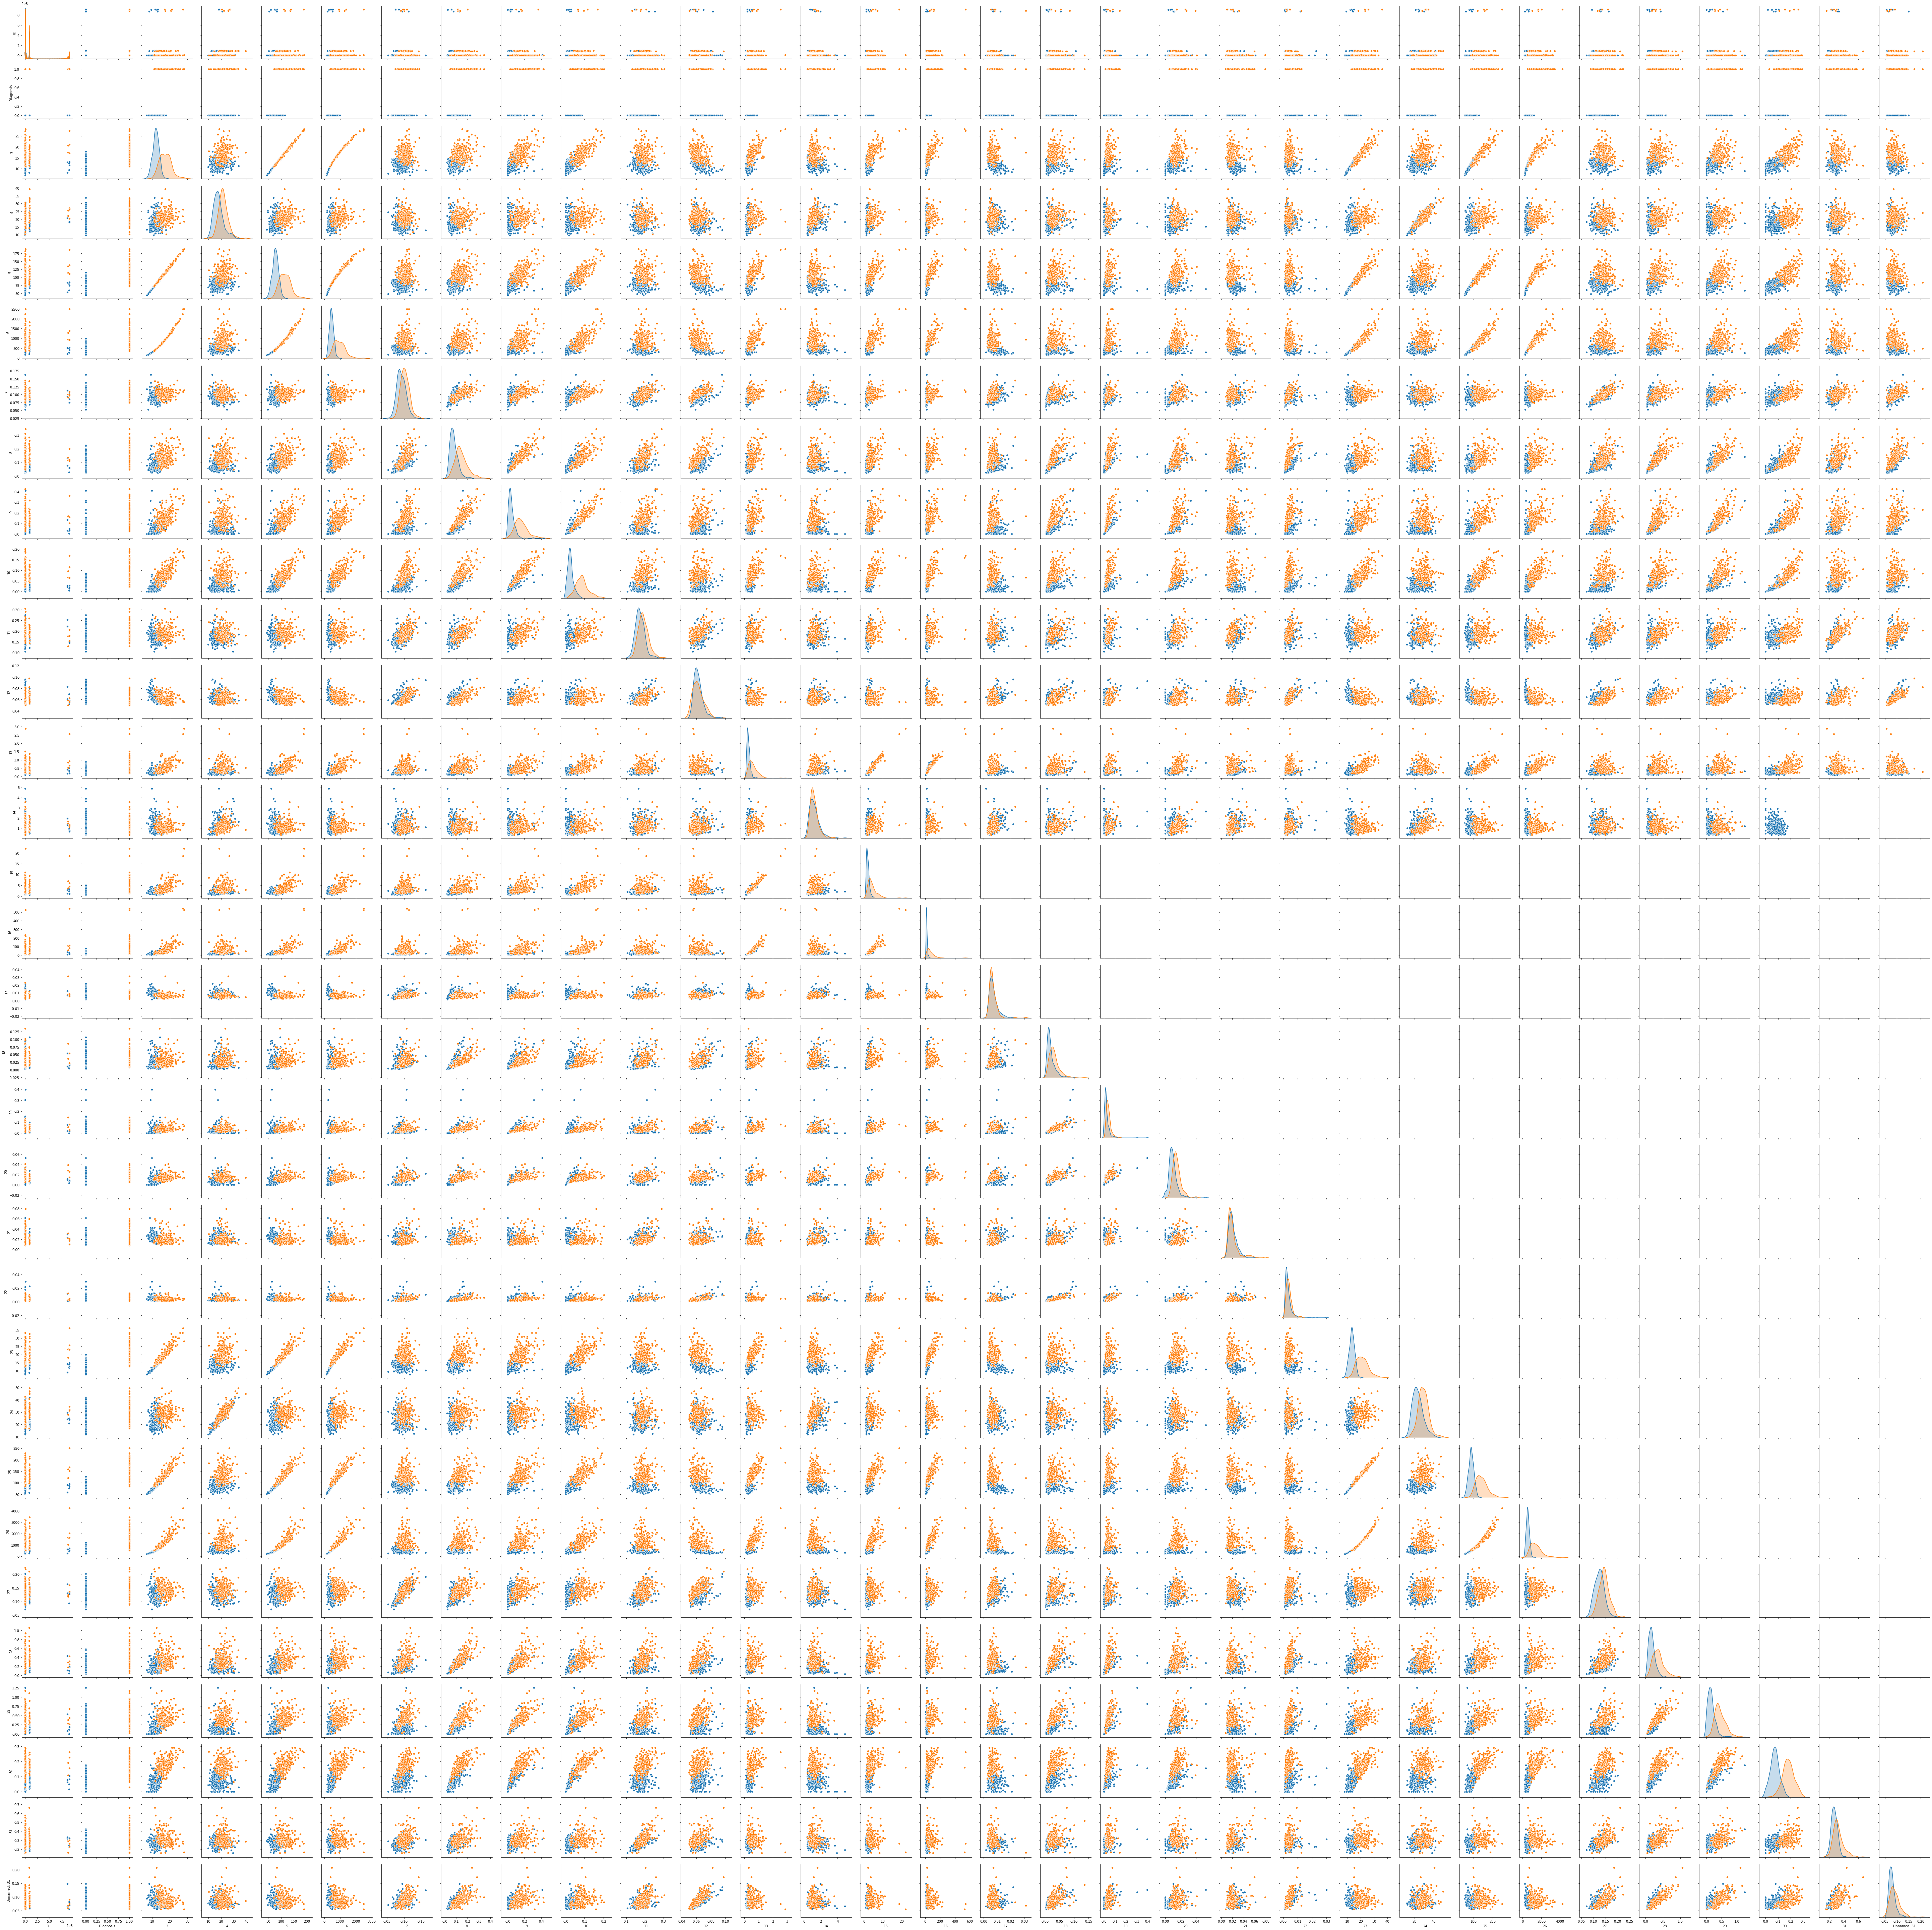

In [0]:
#A “pairs plot” is also known as a scatterplot, in which one variable in the same data row is matched with another variable's value
sns.pairplot(df, hue="Diagnosis")
sns.pairplot(df.iloc[:,1:6], hue="Diagnosis") #plot a sample of the columns

In [0]:
#Print the top 5 rows of the new data set
df.head(5)

ID  Diagnosis      3      4  ...      29      30      31  Unnamed: 31
0    842302          1  17.99  10.38  ...  0.7119  0.2654  0.4601      0.11890
1    842517          1  20.57  17.77  ...  0.2416  0.1860  0.2750      0.08902
2  84300903          1  19.69  21.25  ...  0.4504  0.2430  0.3613      0.08758
3  84348301          1  11.42  20.38  ...  0.6869  0.2575  0.6638      0.17300
4  84358402          1  20.29  14.34  ...  0.4000  0.1625  0.2364      0.07678

[5 rows x 32 columns]

In [0]:
df.corr()
#Get a sample of correlated column info
#df.iloc[:,1:12].corr()     

ID  Diagnosis         3  ...        30        31  Unnamed: 31
ID           1.000000   0.039769  0.074626  ...  0.035174 -0.044224    -0.029866
Diagnosis    0.039769   1.000000  0.730029  ...  0.793566  0.416294     0.323872
3            0.074626   0.730029  1.000000  ...  0.744214  0.163953     0.007066
4            0.099770   0.415185  0.323782  ...  0.295316  0.105008     0.119205
5            0.073159   0.742636  0.997855  ...  0.771241  0.189115     0.051019
6            0.096893   0.708984  0.987357  ...  0.722017  0.143570     0.003738
7           -0.012968   0.358560  0.170581  ...  0.503053  0.394309     0.499316
8            0.000096   0.596534  0.506124  ...  0.815573  0.510223     0.687382
9            0.050080   0.696360  0.676764  ...  0.861323  0.409464     0.514930
10           0.044158   0.776614  0.822529  ...  0.910155  0.375744     0.368661
11          -0.022114   0.330499  0.147741  ...  0.430297  0.699826     0.438413
12          -0.052511  -0.012838 -0.311631  ...  0.175325  0.334019     0.767297
13           0.143048   0.567134  0.679090  ...  0.531062  0.094543     0.049559
14          -0.007526  -0.008303 -0.097317  ... -0.119638 -0.128215    -0.045655
15           0.137331   0.556141  0.674172  ...  0.554897  0.109930     0.085433
16           0.177742   0.548236  0.735864  ...  0.538166  0.074126     0.017539
17           0.096781  -0.067016 -0.222600  ... -0.102007 -0.107342     0.101480
18           0.033961   0.292999  0.206000  ...  0.483208  0.277878     0.590973
19           0.055239   0.253730  0.194204  ...  0.440472  0.197788     0.439329
20           0.078768   0.408042  0.376169  ...  0.602450  0.143116     0.310655
21          -0.017306  -0.006522 -0.104321  ... -0.030413  0.389402     0.078079
22           0.025725   0.077972 -0.042641  ...  0.215204  0.111094     0.591328
23           0.082405   0.776454  0.969539  ...  0.787424  0.243529     0.093492
24           0.064720   0.456903  0.297008  ...  0.359755  0.233027     0.219122
25           0.079986   0.782914  0.965137  ...  0.816322  0.269493     0.138957
26           0.107187   0.733825  0.941082  ...  0.747419  0.209146     0.079647
27           0.010338   0.421465  0.119616  ...  0.547691  0.493838     0.617624
28          -0.002968   0.590998  0.413463  ...  0.801080  0.614441     0.810455
29           0.023203   0.659610  0.526911  ...  0.855434  0.532520     0.686511
30           0.035174   0.793566  0.744214  ...  1.000000  0.502528     0.511114
31          -0.044224   0.416294  0.163953  ...  0.502528  1.000000     0.537848
Unnamed: 31 -0.029866   0.323872  0.007066  ...  0.511114  0.537848     1.000000

[32 rows x 32 columns]

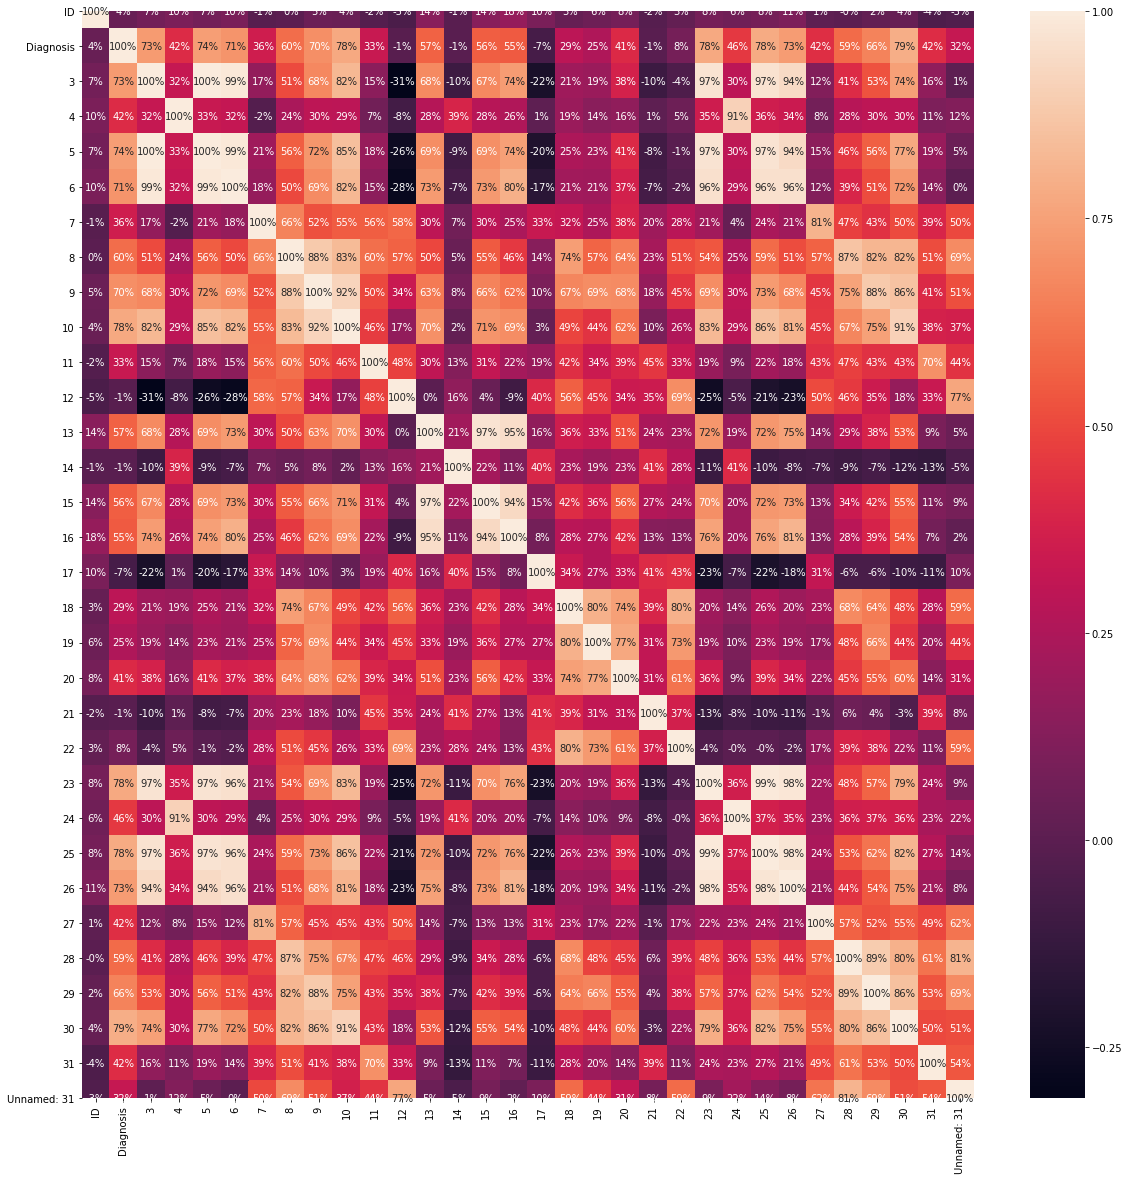

In [0]:
#Visualize the correlation 
#NOTE: To see the numbers within the cell ==>  sns.heatmap(df.corr(), annot=True)
plt.figure(figsize=(20,20))  #This is used to change the size of the figure/ heatmap
sns.heatmap(df.corr(), annot=True, fmt='.0%')
#plt.figure(figsize=(10,10)) #This is used to change the size of the figure/ heatmap
#sns.heatmap(df.iloc[:,1:12].corr(), annot=True, fmt='.0%') #Get a heap map of 11 columns, index 1-11, note index 0 is just the id column and is left out.

In [0]:
#Split the data into independent 'X' and dependent 'Y' variables
X = df.iloc[:, 2:31].values #Notice I started from index  2 to 31, essentially removing the id column & diagnosis
Y = df.iloc[:, 1].values #Get the target variable 'diagnosis' located at index=1

In [0]:
# Now Machine Learning begins
# Split the dataset into 75% Training set and 25% Testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [0]:
# Scale the data to bring all features to the same level of magnitude
# This means the data will be within a specific range for example 0 -100 or 0 - 1

#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [0]:
#Create a function within many Machine Learning Models
def models(X_train,Y_train):
  
  #Using Logistic Regression Algorithm to the Training Set
  from sklearn.linear_model import LogisticRegression
  log = LogisticRegression(random_state = 0)
  log.fit(X_train, Y_train)
  
  #Using KNeighborsClassifier Method of neighbors class to use Nearest Neighbor algorithm
  from sklearn.neighbors import KNeighborsClassifier
  knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
  knn.fit(X_train, Y_train)

  #Using SVC method of svm class to use Support Vector Machine Algorithm
  from sklearn.svm import SVC
  svc_lin = SVC(kernel = 'linear', random_state = 0)
  svc_lin.fit(X_train, Y_train)

  #Using SVC method of svm class to use Kernel SVM Algorithm
  from sklearn.svm import SVC
  svc_rbf = SVC(kernel = 'rbf', random_state = 0)
  svc_rbf.fit(X_train, Y_train)

  #Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm
  from sklearn.naive_bayes import GaussianNB
  gauss = GaussianNB()
  gauss.fit(X_train, Y_train)

  #Using DecisionTreeClassifier of tree class to use Decision Tree Algorithm
  from sklearn.tree import DecisionTreeClassifier
  tree = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
  tree.fit(X_train, Y_train)

  #Using RandomForestClassifier method of ensemble class to use Random Forest Classification algorithm
  from sklearn.ensemble import RandomForestClassifier
  forest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
  forest.fit(X_train, Y_train)
  
  #print model accuracy on the training data.
  print('[0]Logistic Regression Training Accuracy:', log.score(X_train, Y_train))
  print('[1]K Nearest Neighbor Training Accuracy:', knn.score(X_train, Y_train))
  print('[2]Support Vector Machine (Linear Classifier) Training Accuracy:', svc_lin.score(X_train, Y_train))
  print('[3]Support Vector Machine (RBF Classifier) Training Accuracy:', svc_rbf.score(X_train, Y_train))
  print('[4]Gaussian Naive Bayes Training Accuracy:', gauss.score(X_train, Y_train))
  print('[5]Decision Tree Classifier Training Accuracy:', tree.score(X_train, Y_train))
  print('[6]Random Forest Classifier Training Accuracy:', forest.score(X_train, Y_train))
  
  return log, knn, svc_lin, svc_rbf, gauss, tree, forest

In [0]:
model = models(X_train,Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0]Logistic Regression Training Accuracy: 0.9906103286384976
[1]K Nearest Neighbor Training Accuracy: 0.9765258215962441
[2]Support Vector Machine (Linear Classifier) Training Accuracy: 0.9882629107981221
[3]Support Vector Machine (RBF Classifier) Training Accuracy: 0.9835680751173709
[4]Gaussian Naive Bayes Training Accuracy: 0.9507042253521126
[5]Decision Tree Classifier Training Accuracy: 1.0
[6]Random Forest Classifier Training Accuracy: 0.9953051643192489


In [0]:
from sklearn.metrics import confusion_matrix
for i in range(len(model)):
  cm = confusion_matrix(Y_test, model[i].predict(X_test))
  
  TN = cm[0][0]
  TP = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]
  
  print(cm)
  print('Model[{}] Testing Accuracy = "{}!"'.format(i,  (TP + TN) / (TP + TN + FN + FP)))
  print()# Print a new line

[[86  4]
 [ 4 49]]
Model[0] Testing Accuracy = "0.9440559440559441!"

[[89  1]
 [ 5 48]]
Model[1] Testing Accuracy = "0.958041958041958!"

[[87  3]
 [ 2 51]]
Model[2] Testing Accuracy = "0.965034965034965!"

[[88  2]
 [ 3 50]]
Model[3] Testing Accuracy = "0.965034965034965!"

[[85  5]
 [ 6 47]]
Model[4] Testing Accuracy = "0.9230769230769231!"

[[84  6]
 [ 1 52]]
Model[5] Testing Accuracy = "0.951048951048951!"

[[87  3]
 [ 2 51]]
Model[6] Testing Accuracy = "0.965034965034965!"



In [0]:

#Show other ways to get the classification accuracy & other metrics 

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range(len(model)):
  print('Model ',i)
  #Check precision, recall, f1-score
  print( classification_report(Y_test, model[i].predict(X_test)) )
  #Another way to get the models accuracy on the test data
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()#Print a new line

Model  0
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        90
           1       0.92      0.92      0.92        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143

0.9440559440559441

Model  1
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        90
           1       0.98      0.91      0.94        53

    accuracy                           0.96       143
   macro avg       0.96      0.95      0.95       143
weighted avg       0.96      0.96      0.96       143

0.958041958041958

Model  2
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        90
           1       0.94      0.96      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.96      0.96       143
weighted

In [0]:
#Print Prediction of Random Forest Classifier model
pred = model[4].predict(X_test)
print("MY Model prediction")
print( pred)

#Print a space
print()

#Print the actual values
print("Actual Values")
print(Y_test)

MY Model prediction
[1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1]

Actual Values
[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0 0 1]
